<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/dbda/ch09-heirarchical-models/heirarchical_on_mint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
from runpy import run_path

az.style.use('arviz-darkgrid')
%matplotlib inline

In [2]:
!rm -rf data-science-hw
!git clone https://github.com/ctarrington/data-science-hw.git

base_path = './data-science-hw/dbda/ch08-basic-models/'
Coin = run_path(base_path+'/mint.py').get('Coin')
Mint = run_path(base_path+'/mint.py').get('Mint')

Cloning into 'data-science-hw'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 145 (delta 69), reused 16 (delta 3), pack-reused 0
Receiving objects: 100% (145/145), 1.75 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [3]:
coins_per_mint = 5
mint = Mint(0.3, 0.025)
coins = mint.make_coins(coins_per_mint)

mint = Mint(0.7, 0.025)
mint.make_coins(coins_per_mint, coins)

In [4]:
flips = []
for ctr in range(50):
  for coin in coins:
    coin.flip(flips)

In [5]:
df = pd.DataFrame(flips, columns=['mint_id', 'coin_id', 'flip'])
df.head()

,mint_id,coin_id,flip
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


In [6]:
coin_id = df['coin_id']
mint_id = df['mint_id']

num_coins = len(np.unique(coin_id))
num_mints = len(np.unique(mint_id))

print('num_coins', num_coins)
print('num_mints', num_mints)

num_coins 10
num_mints 2


## No Heirarchy - Coins

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 0, 0 divergences:   0%|          | 0/2500 [00:00<?, ?it/s]/usr/local/lib/python3.6/di

       mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ[0]  0.212  0.055   0.113    0.318  ...  5382.0    5301.0    2613.0    1.0
θ[1]  0.308  0.063   0.195    0.428  ...  5064.0    5200.0    3153.0    1.0
θ[2]  0.404  0.066   0.282    0.529  ...  5492.0    5469.0    3412.0    1.0
θ[3]  0.441  0.066   0.316    0.564  ...  4328.0    4312.0    2834.0    1.0
θ[4]  0.288  0.064   0.171    0.410  ...  4869.0    4943.0    2813.0    1.0
θ[5]  0.635  0.066   0.513    0.753  ...  5567.0    5615.0    3004.0    1.0
θ[6]  0.731  0.061   0.621    0.846  ...  4789.0    4782.0    2593.0    1.0
θ[7]  0.654  0.066   0.518    0.767  ...  4723.0    4807.0    3047.0    1.0
θ[8]  0.691  0.063   0.570    0.803  ...  5476.0    5472.0    3601.0    1.0
θ[9]  0.675  0.064   0.558    0.795  ...  5060.0    5075.0    3437.0    1.0

[10 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarnin

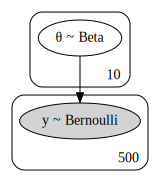

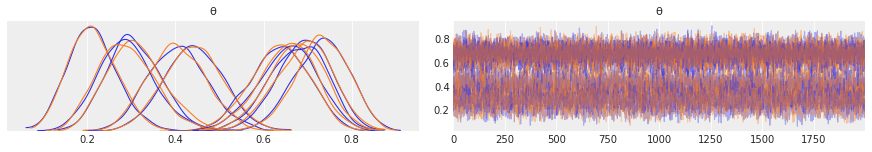

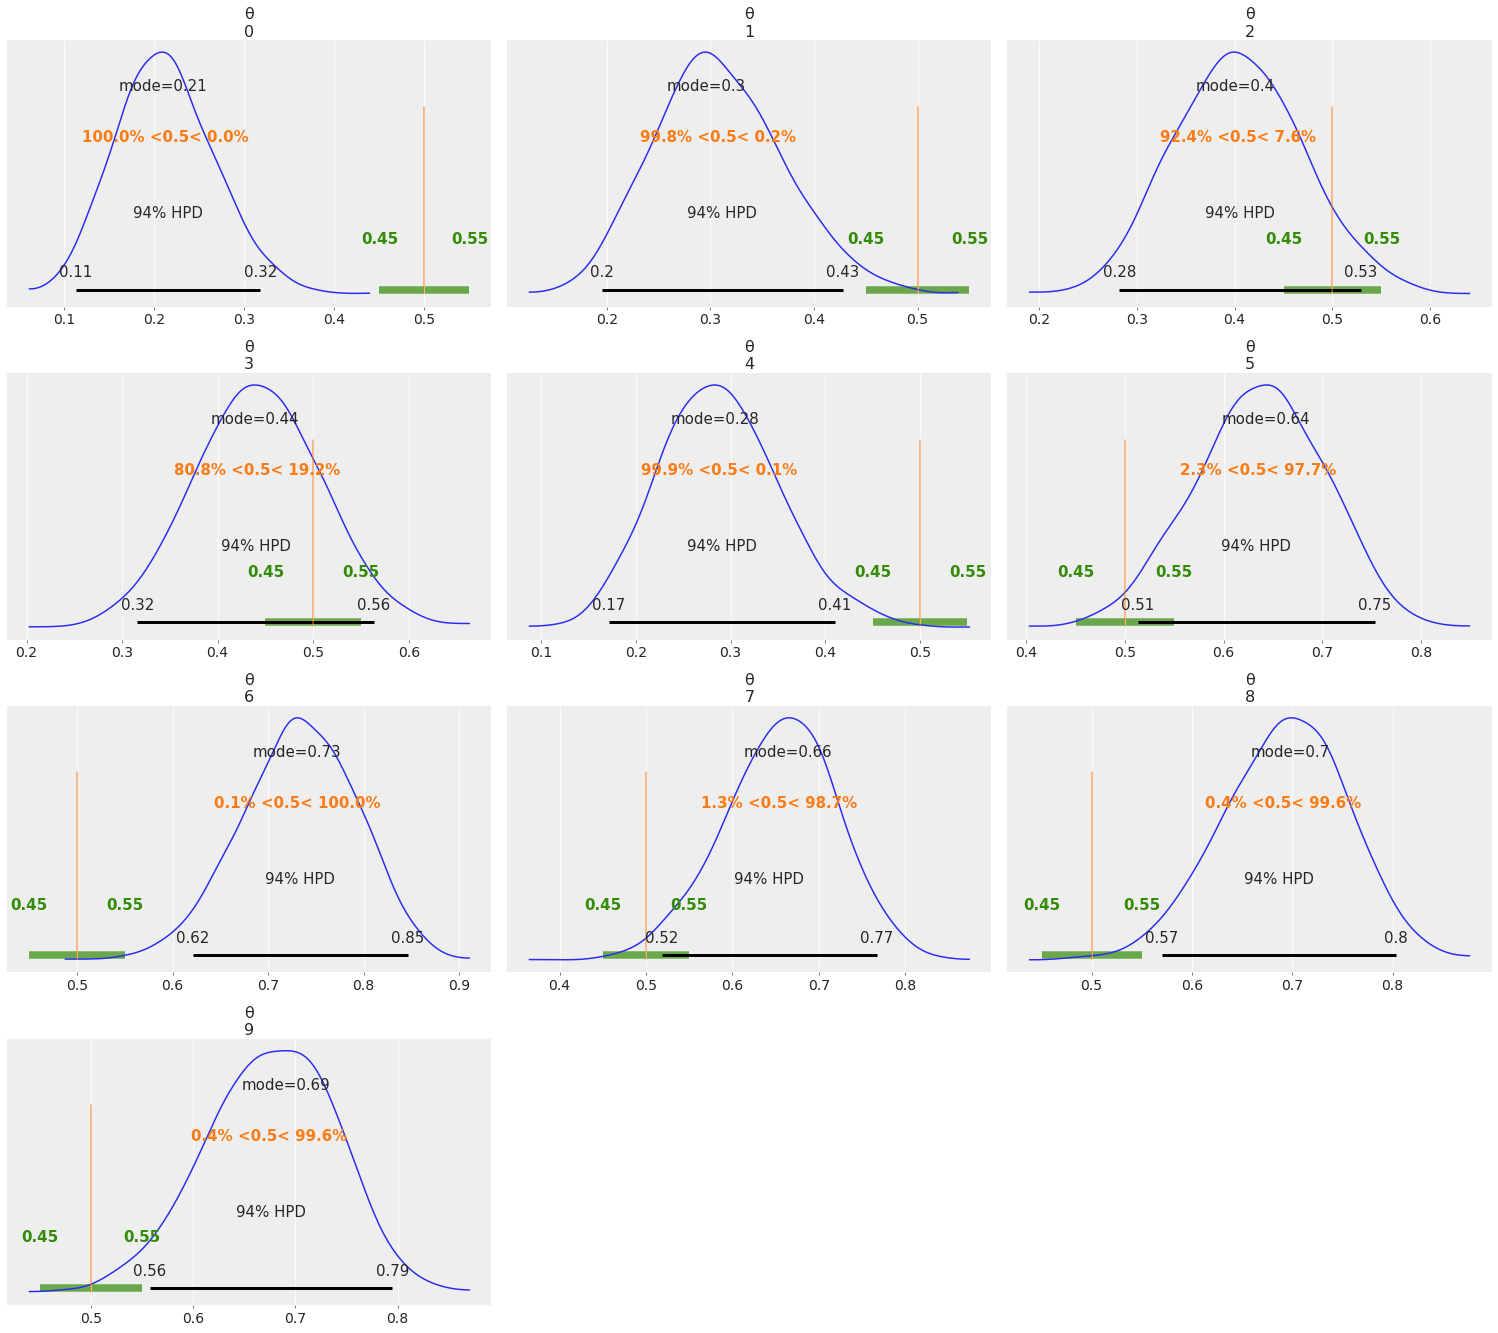

In [7]:
with pm.Model() as model:
  θ = pm.Beta('θ', alpha=1., beta=1., shape=num_coins)   # uniform prior
  
  y = pm.Bernoulli('y', p=θ[coin_id], observed=df['flip']) # likelihood p(y|θ)

  trace = pm.sample(2000, random_seed=123)
  print(az.summary(trace))
  pm.traceplot(trace)
  az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

pm.model_to_graphviz(model)

## No Heirarchy - Mints


/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:02<00:00, 934.73it/s]
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


       mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ[0]  0.325  0.029   0.270    0.379  ...  3261.0    3391.0    2418.0    1.0
θ[1]  0.683  0.029   0.626    0.735  ...  3478.0    3484.0    2420.0    1.0

[2 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarnin

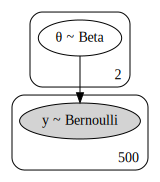

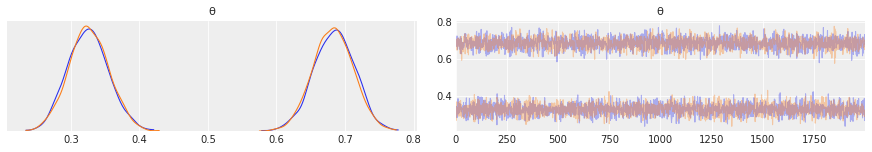

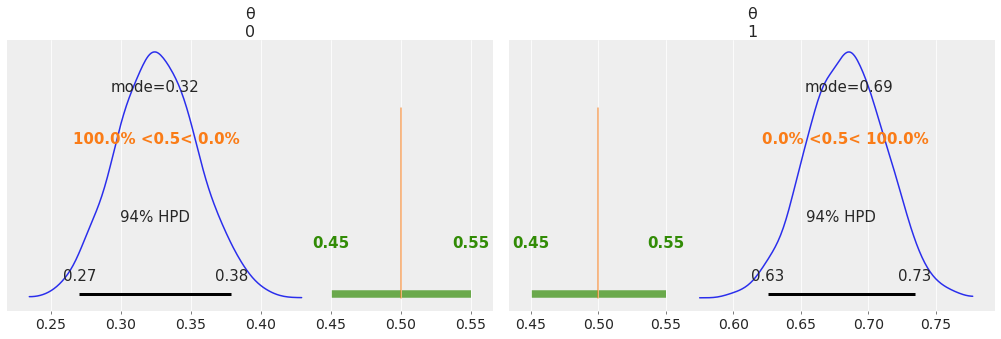

In [8]:
mint_id = df['mint_id']

with pm.Model() as model:
  θ = pm.Beta('θ', alpha=1., beta=1., shape=num_mints)   # uniform prior
  
  y = pm.Bernoulli('y', p=θ[mint_id], observed=df['flip']) # likelihood p(y|θ)

  trace = pm.sample(2000, random_seed=123)
  print(az.summary(trace))
  pm.traceplot(trace)
  az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

pm.model_to_graphviz(model)

## Heirarchy under Mint

In [9]:
grouped = df.groupby(['mint_id', 'coin_id']).agg({'flip': [np.sum, np.size]}).reset_index()
grouped.columns = ['mint_id', 'coin_id', 'heads', 'total']

# mint id series needs to be the length of the mints
mint_id = grouped['mint_id']

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

             mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
μ_mint[0]   0.338  0.067   0.213    0.469  ...  4177.0    4573.0    3139.0    1.0
μ_mint[1]   0.669  0.063   0.547    0.781  ...  6148.0    6228.0    2975.0    1.0
κ_mint[0]  13.113  5.993   2.676   23.992  ...  4826.0    5167.0    2981.0    1.0
κ_mint[1]  14.714  6.460   3.325   26.468  ...  5146.0    5267.0    2585.0    1.0
θ_coin[0]   0.227  0.054   0.131    0.332  ...  6023.0    5916.0    2373.0    1.0
θ_coin[1]   0.307  0.059   0.201    0.421  ...  6182.0    6034.0    2772.0    1.0
θ_coin[2]   0.387  0.063   0.272    0.505  ...  7119.0    7349.0    2567.0    1.0
θ_coin[3]   0.419  0.062   0.300    0.530  ...  6884.0    7030.0    2422.0    1.0
θ_coin[4]   0.290  0.058   0.180    0.401  ...  6892.0    7391.0    2540.0    1.0
θ_coin[5]   0.648  0.060   0.539    0.763  ...  7016.0    7052.0    2900.0    1.0
θ_coin[6]   0.724  0.058   0.617    0.834  ...  7727.0    7712.0    2838.0    1.0
θ_coin[7]   0.66

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarnin

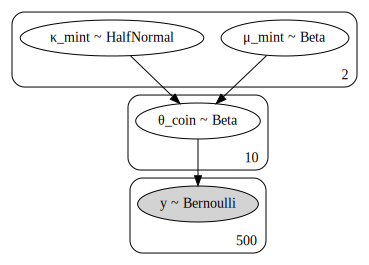

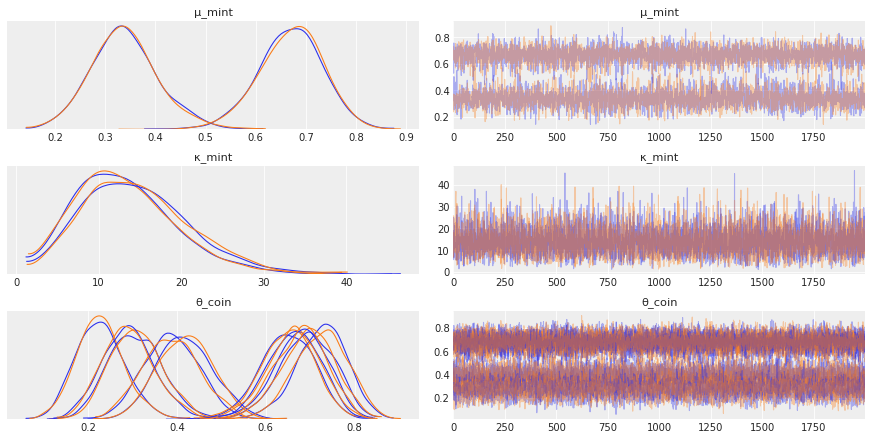

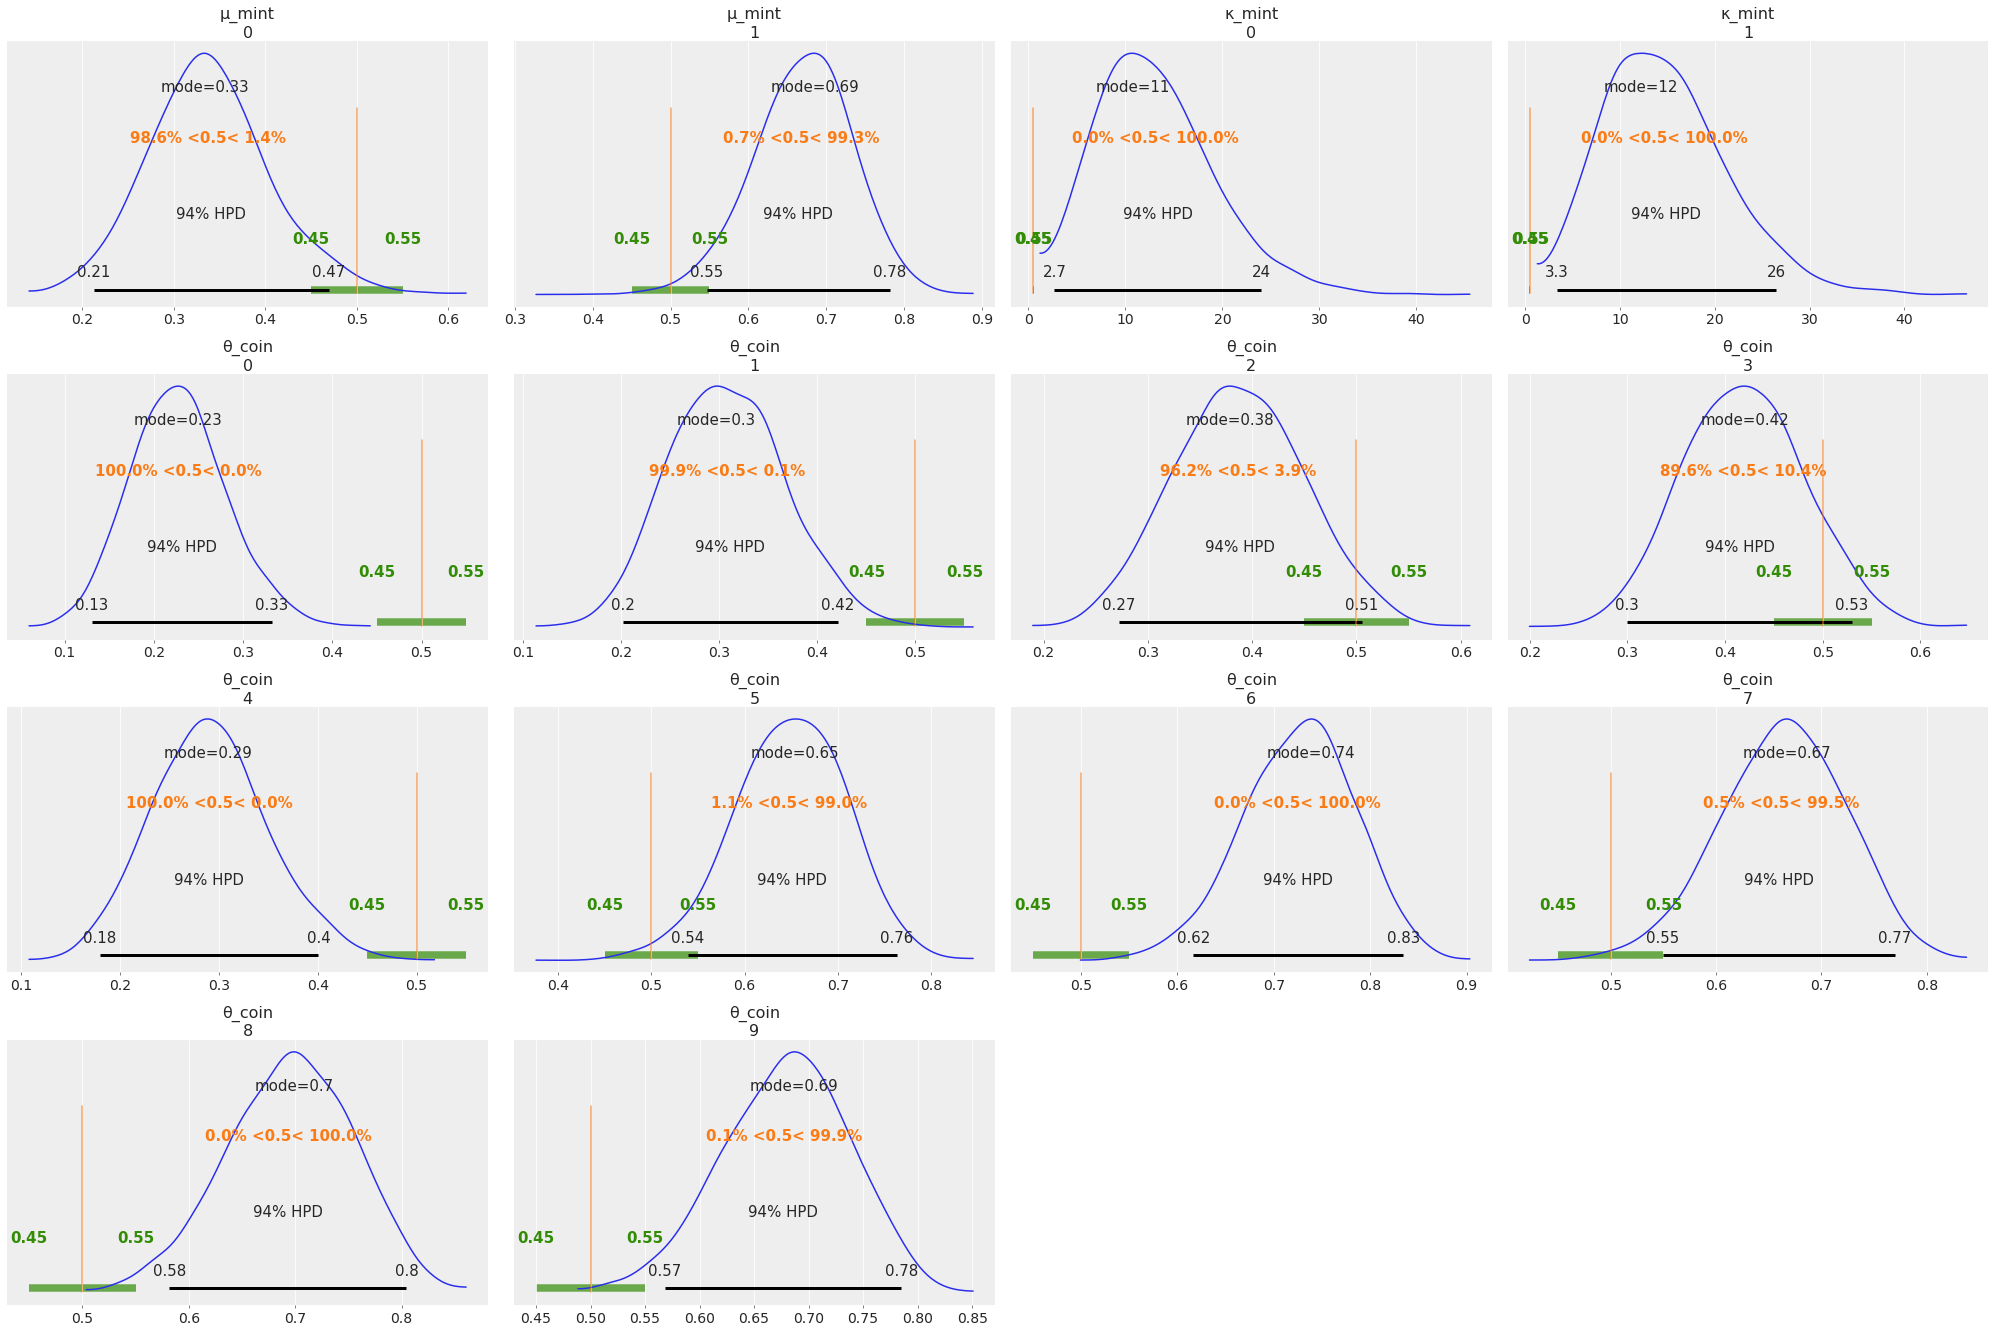

In [10]:
with pm.Model() as model_h_mint:
    μ_mint = pm.Beta('μ_mint', 0.5, 0.5, shape=num_mints) # bimodal prior
    κ_mint = pm.HalfNormal('κ_mint', 10, shape=num_mints)    

    θ_coin = pm.Beta('θ_coin', alpha=μ_mint[mint_id]*κ_mint[mint_id], beta=(1.0-μ_mint[mint_id])*κ_mint[mint_id], shape=num_coins)
    y = pm.Bernoulli('y', p=θ_coin[coin_id], observed=df['flip']) # likelihood p(y|θ)
  
    trace = pm.sample(2000, random_seed=123)
    print(az.summary(trace))
    pm.traceplot(trace)
    az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

pm.model_to_graphviz(model_h_mint)